<h1>Data Exploration

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from math import sqrt
from scipy import stats

# turn off pink boxes for demo
import warnings
warnings.filterwarnings("ignore")

import wrangle as wr
import explore as ex

In [2]:
df = pd.read_csv('Base.csv')
df.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,...,0,1500.0,0,INTERNET,16.224843,linux,1,1,0,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,...,0,1500.0,0,INTERNET,3.363854,other,1,1,0,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,...,0,200.0,0,INTERNET,22.730559,windows,0,1,0,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,...,0,200.0,0,INTERNET,15.215816,linux,1,1,0,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,...,0,200.0,0,INTERNET,3.743048,other,0,1,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

In [74]:
df.columns

Index(['fraud_bool', 'income', 'name_email_similarity',
       'prev_address_months_count', 'current_address_months_count',
       'customer_age', 'days_since_request', 'intended_balcon_amount',
       'payment_type', 'zip_count_4w', 'velocity_6h', 'velocity_24h',
       'velocity_4w', 'bank_branch_count_8w',
       'date_of_birth_distinct_emails_4w', 'employment_status',
       'credit_risk_score', 'email_is_free', 'housing_status',
       'phone_home_valid', 'phone_mobile_valid', 'bank_months_count',
       'has_other_cards', 'proposed_credit_limit', 'foreign_request', 'source',
       'session_length_in_minutes', 'device_os', 'keep_alive_session',
       'device_distinct_emails_8w', 'device_fraud_count', 'month'],
      dtype='object')

<b>Datatypes

In [4]:
df.dtypes

fraud_bool                            int64
income                              float64
name_email_similarity               float64
prev_address_months_count             int64
current_address_months_count          int64
customer_age                          int64
days_since_request                  float64
intended_balcon_amount              float64
payment_type                         object
zip_count_4w                          int64
velocity_6h                         float64
velocity_24h                        float64
velocity_4w                         float64
bank_branch_count_8w                  int64
date_of_birth_distinct_emails_4w      int64
employment_status                    object
credit_risk_score                     int64
email_is_free                         int64
housing_status                       object
phone_home_valid                      int64
phone_mobile_valid                    int64
bank_months_count                     int64
has_other_cards                 

<b>Let's Handle Any Possible Duplicates

In [5]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

<b>Double check for Nulls

In [6]:
df.isnull().sum()

fraud_bool                          0
income                              0
name_email_similarity               0
prev_address_months_count           0
current_address_months_count        0
customer_age                        0
days_since_request                  0
intended_balcon_amount              0
payment_type                        0
zip_count_4w                        0
velocity_6h                         0
velocity_24h                        0
velocity_4w                         0
bank_branch_count_8w                0
date_of_birth_distinct_emails_4w    0
employment_status                   0
credit_risk_score                   0
email_is_free                       0
housing_status                      0
phone_home_valid                    0
phone_mobile_valid                  0
bank_months_count                   0
has_other_cards                     0
proposed_credit_limit               0
foreign_request                     0
source                              0
session_leng

<b>Let's look for outliers

<b>Removing Outliers

In [7]:
def identify_columns(df):
    cat_cols, num_cols = [], []

    for col in df.columns:
        if df[col].dtype == 'O':
            cat_cols.append(col)
        else:
            if df[col].nunique() < 6:
                cat_cols.append(col)
            else:
                num_cols.append(col)

    return cat_cols, num_cols

In [8]:
#remove outliers function
def remove_outliers(df, k):
    ''' remove outliers from a list of columns in a dataframe 
        and return that dataframe
    '''
    
    cat_cols, num_cols = identify_columns(df)
    
    for col in num_cols:
        
        # For each column, it calculates the first quartile (q1) and 
        #third quartile (q3) using the .quantile() method, where q1 
        #corresponds to the 30th percentile and q3 corresponds to the 80th percentile.
        q1, q3 = df[col].quantile([.30, .80])  # get quartiles
        
        iqr = q3 - q1   # calculate interquartile range
        
        upper_bound = q3 + k * iqr   # get upper bound
        lower_bound = q1 - k * iqr   # get lower bound

        # return dataframe without outliers
        
        df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
        
    return df

In [9]:
df.shape

(1000000, 32)

In [10]:
df = remove_outliers(df, 4)

In [11]:
df.shape

(713070, 32)

In [12]:
df.columns.value_counts().sum()

32

In [14]:
#for col in num_cols:
#    print(col.upper())
#    print("count of unique:",df[col].nunique())
#    # plot
#    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(17,4))
#    sns.boxplot(data= df, x=col, ax=ax[0])
#    sns.violinplot(data= df, x=col, ax=ax[1])
#    sns.kdeplot(df, x=col, ax=ax[2])
#    plt.tight_layout()
#    plt.show()

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fraud_bool,713070.0,0.011462,0.106444,0.000000e+00,0.000000,0.000000,0.000000,1.000000
income,713070.0,0.563953,0.290489,1.000000e-01,0.300000,0.600000,0.800000,0.900000
name_email_similarity,713070.0,0.496662,0.287578,1.434550e-06,0.231907,0.493870,0.757874,0.999999
prev_address_months_count,713070.0,10.544642,24.520243,-1.000000e+00,-1.000000,-1.000000,10.000000,138.000000
current_address_months_count,713070.0,86.703010,87.212784,-1.000000e+00,22.000000,53.000000,129.000000,425.000000
customer_age,713070.0,33.316603,11.746977,1.000000e+01,20.000000,30.000000,40.000000,70.000000
days_since_request,713070.0,0.015275,0.010948,4.036860e-09,0.006382,0.013337,0.022229,0.113602
intended_balcon_amount,713070.0,5.650257,14.924747,-1.553055e+01,-1.209907,-0.883643,-0.416131,90.080673
zip_count_4w,713070.0,1563.737006,1003.390432,1.000000e+00,886.000000,1256.000000,1940.000000,6700.000000
velocity_6h,713070.0,5535.026799,2976.768730,-1.706031e+02,3339.042264,5180.113024,7489.913531,16715.565404


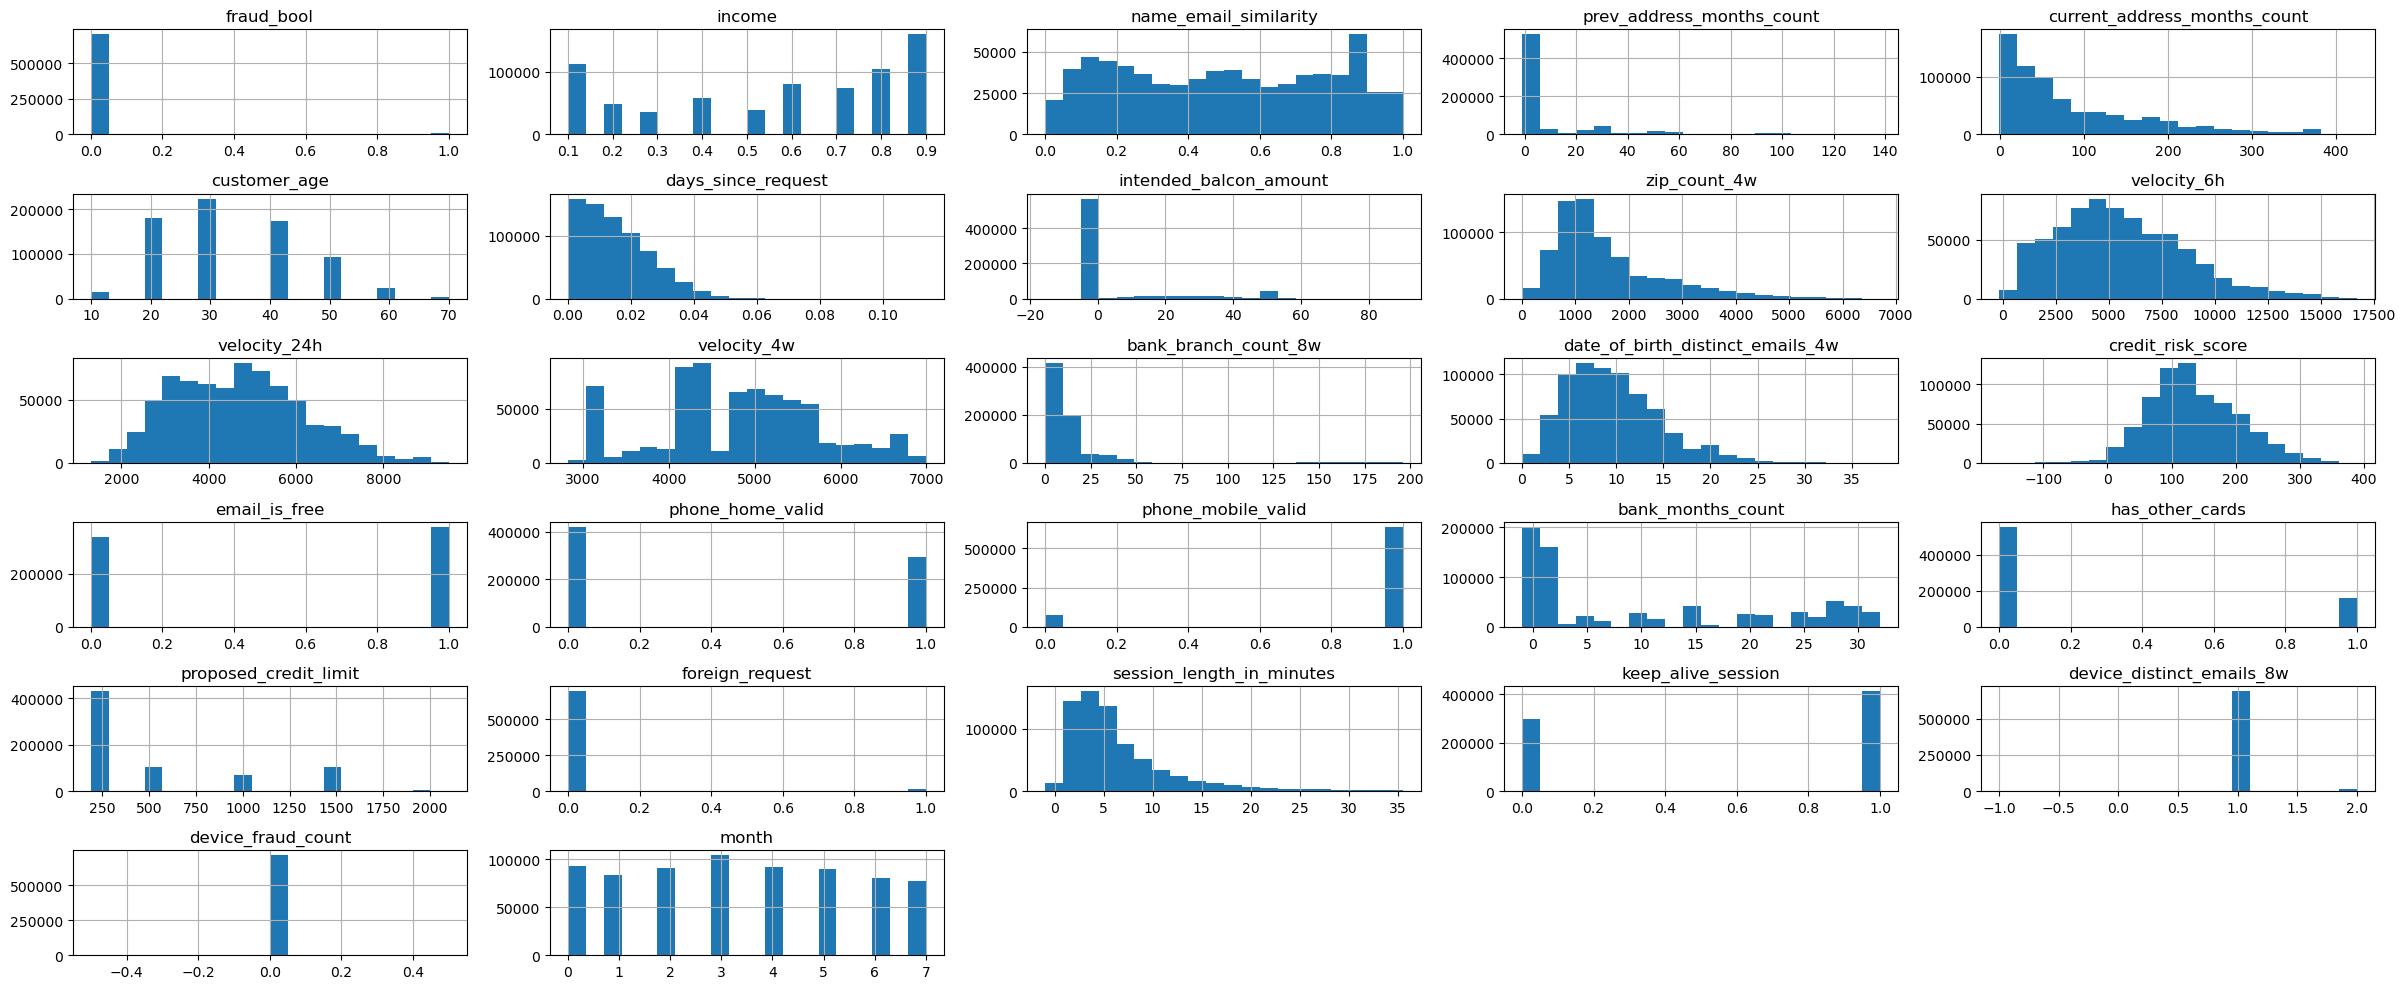

In [16]:
df.hist(figsize=(24, 10), bins=20)
plt.tight_layout()

<b><h3>Univariate Exploration

<b>Let's look at the distribution of the variables

In [17]:
df['fraud_bool'].value_counts()

0    704897
1      8173
Name: fraud_bool, dtype: int64

<b>Percentage of Actual Credit Card Fraud in the Dataframe

In [18]:
round((df[df['fraud_bool'] == 1].value_counts().sum() / df[df['fraud_bool'] == 0].value_counts().sum()) * 100, 2)

1.16

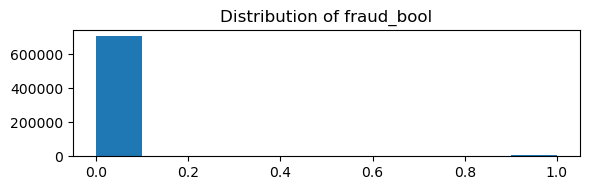

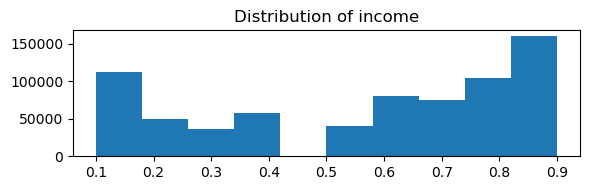

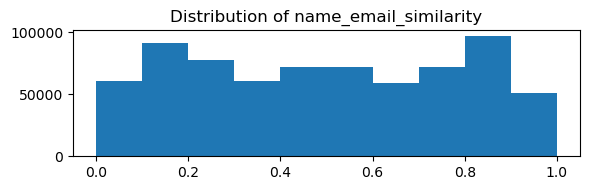

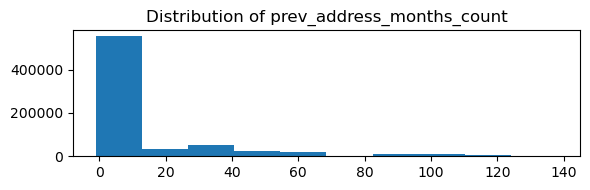

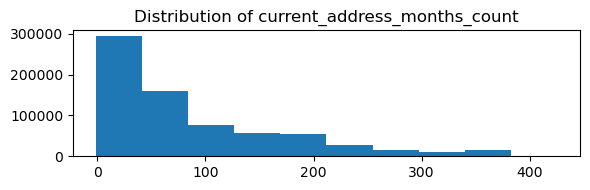

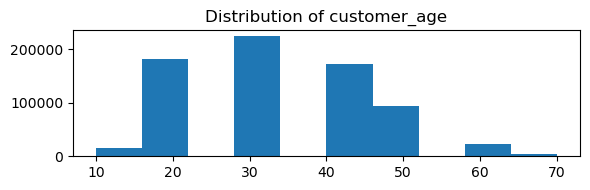

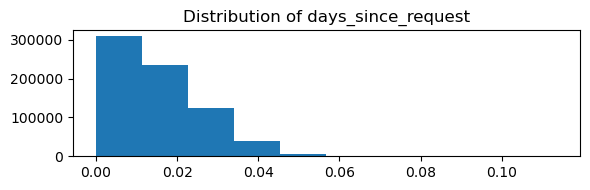

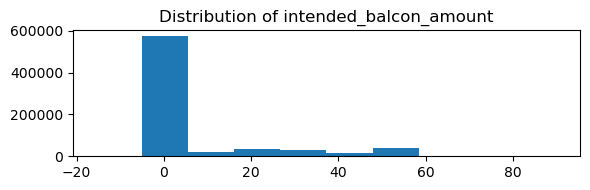

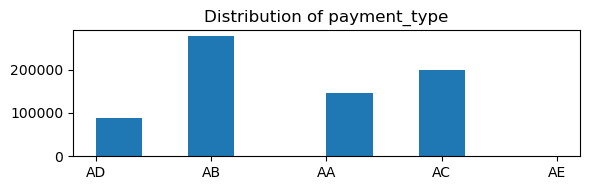

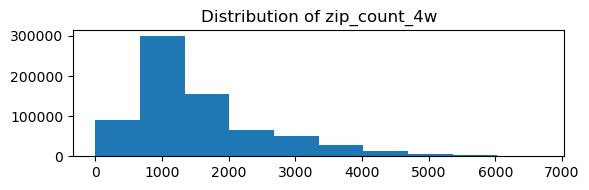

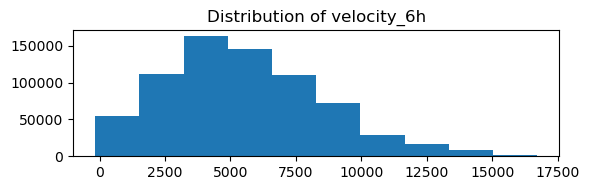

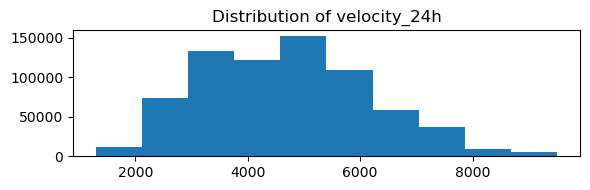

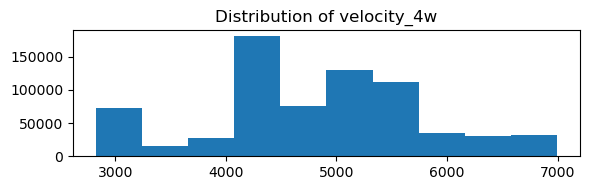

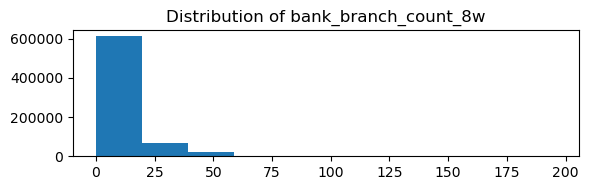

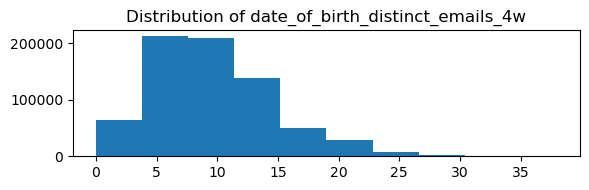

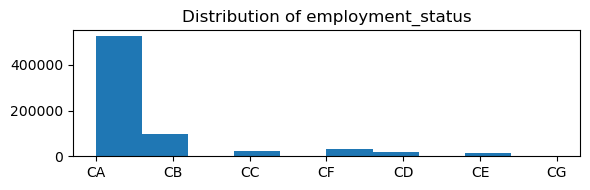

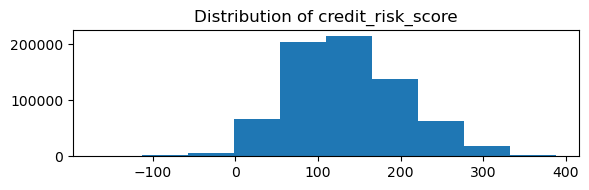

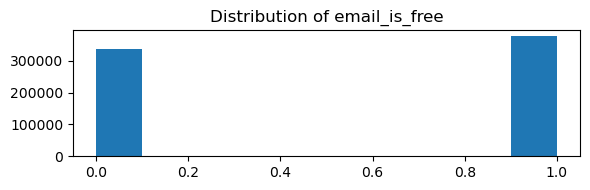

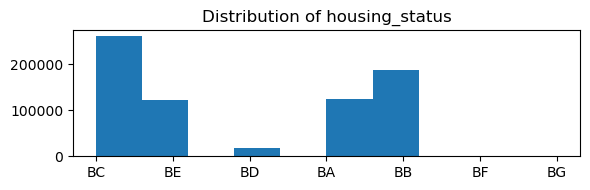

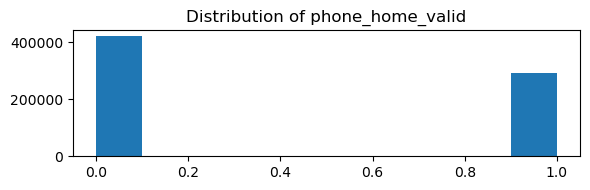

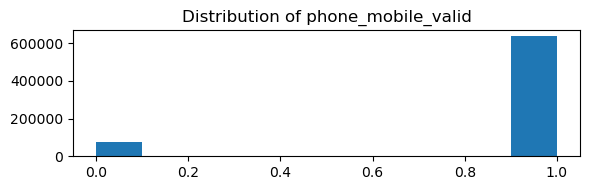

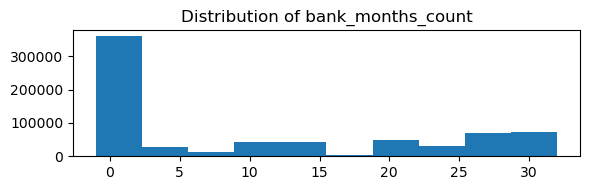

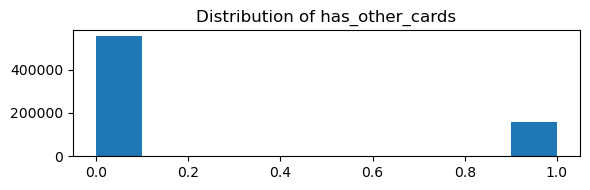

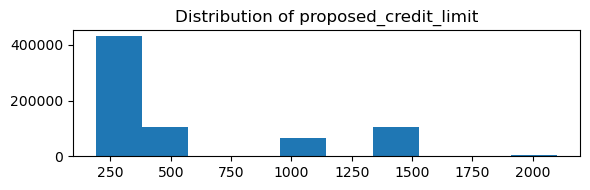

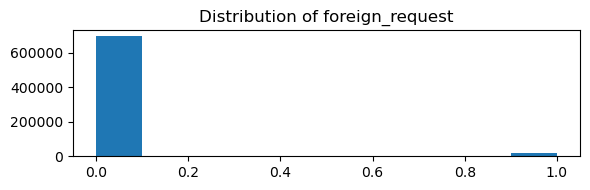

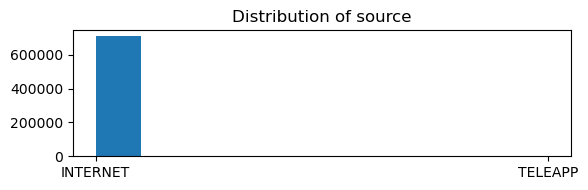

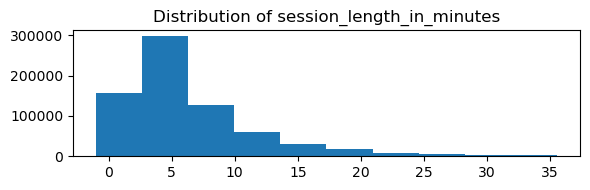

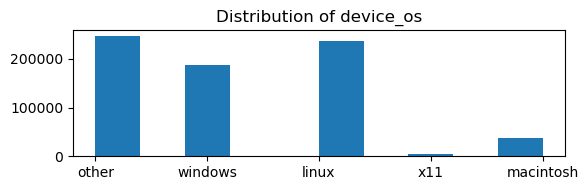

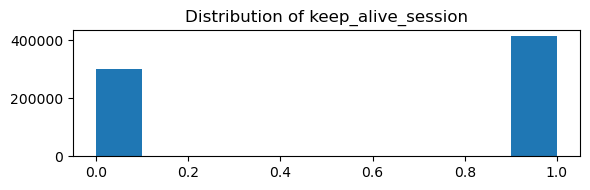

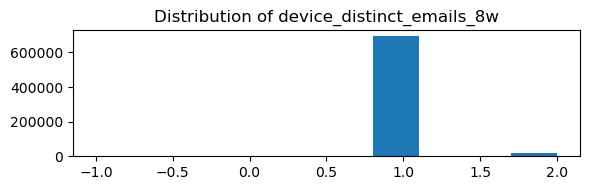

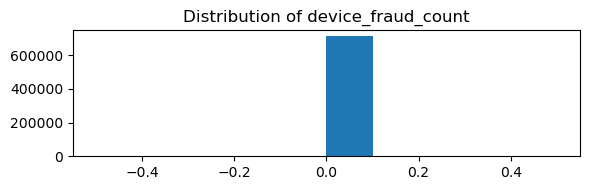

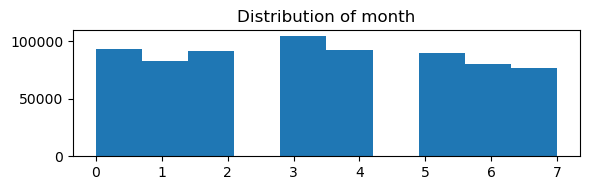

In [19]:
for col in df:
    plt.figure(figsize = (6,2))
    plt.hist(df[col])
    plt.title(f'Distribution of {col}')
    plt.tight_layout();

<b><h3>Initial Questions after initial uni exploration:
> 1. Are any of the features correlated? 

> 2. Classification or regression? Should I do both for a comparison given the time I have to work on this?

> 3. Are all input variables relevant? Which ones are <b>MOST</b> relevant?
    
> 4. How many feature do I want to go into my model? 

<b><h3>Bi-Variate Exploration

> > <b>Let's split the data first

In [20]:
target = df['fraud_bool']
train, validate, test = wr.split_data(df, target, seed=123)
train.shape, validate.shape, test.shape

((399319, 32), (171137, 32), (142614, 32))

In [21]:
X_train = train.drop(columns='fraud_bool')
y_train = train[['fraud_bool']]

In [22]:
cat_cols, num_cols = [], []
for col in X_train.columns:
    if X_train[col].dtype == 'O':
        cat_cols.append(col)
    else:
        if X_train[col].nunique() < 10:
            cat_cols.append(col)
        else:
            num_cols.append(col)

<b>I want to see my numerical variables against my target for comparison . . . maybe there's something to see?

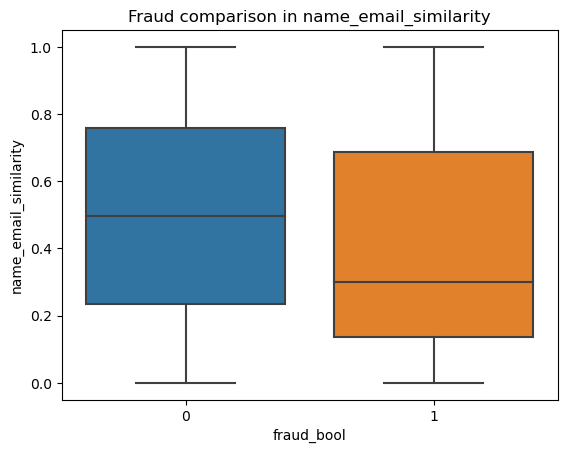

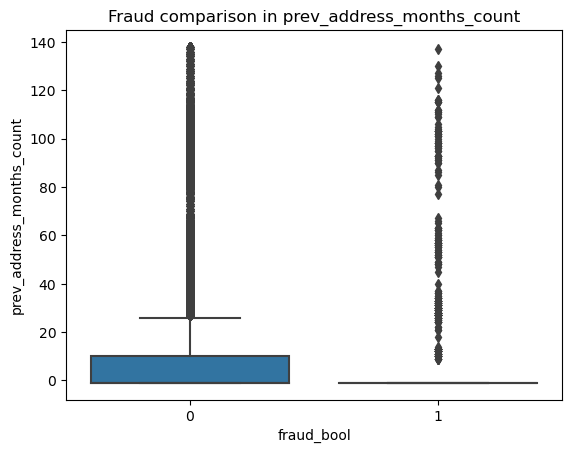

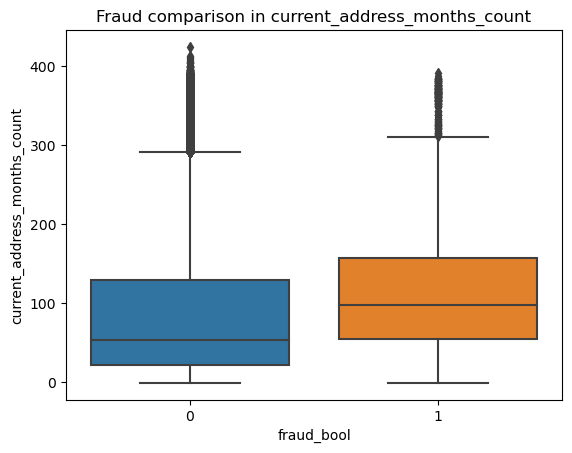

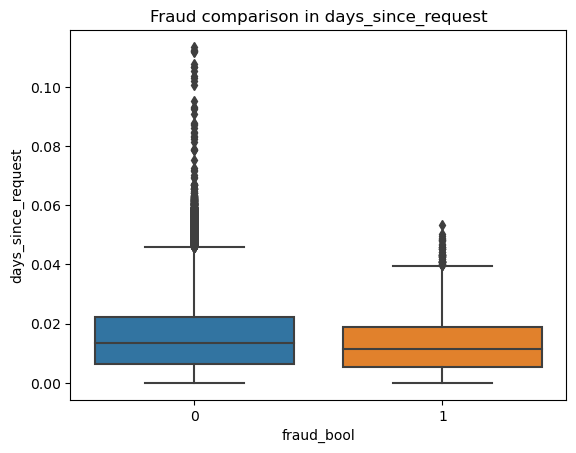

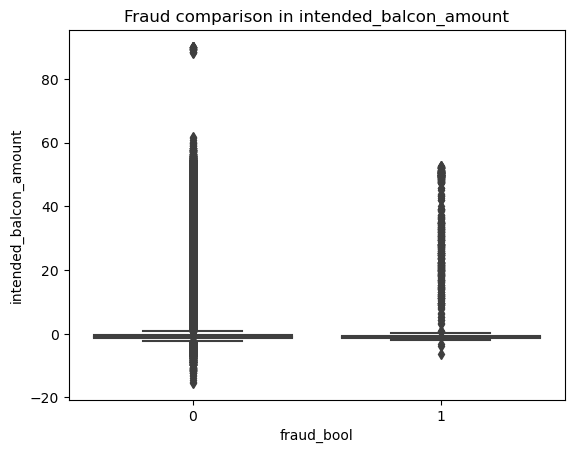

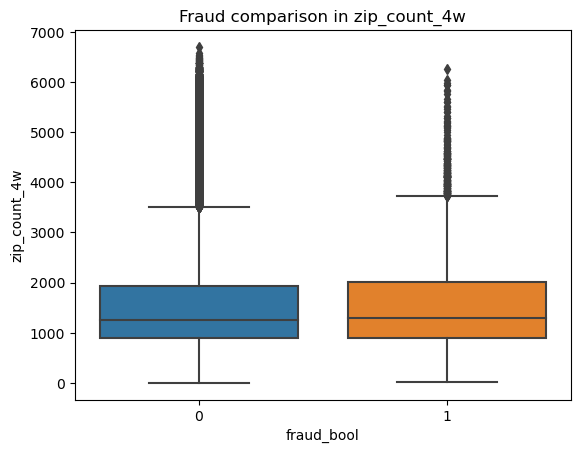

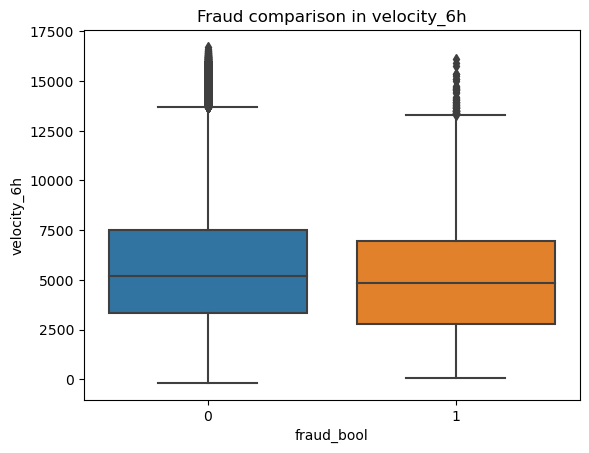

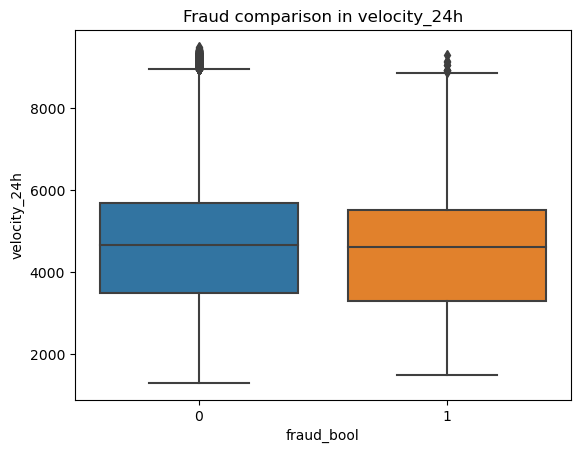

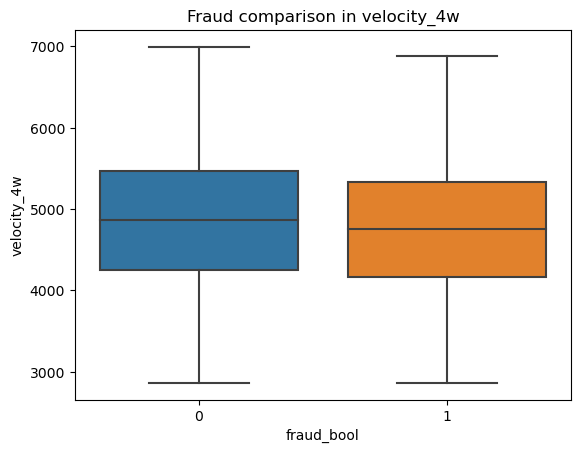

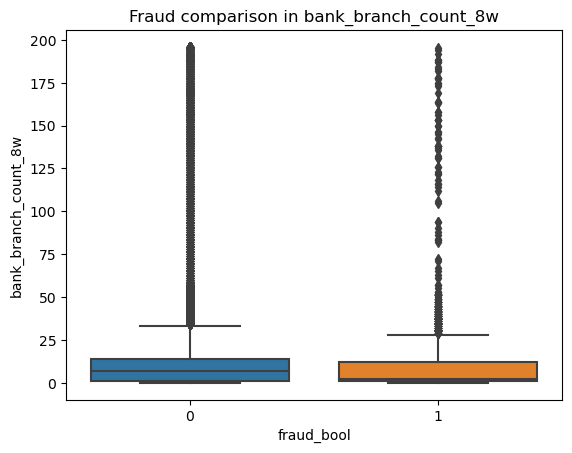

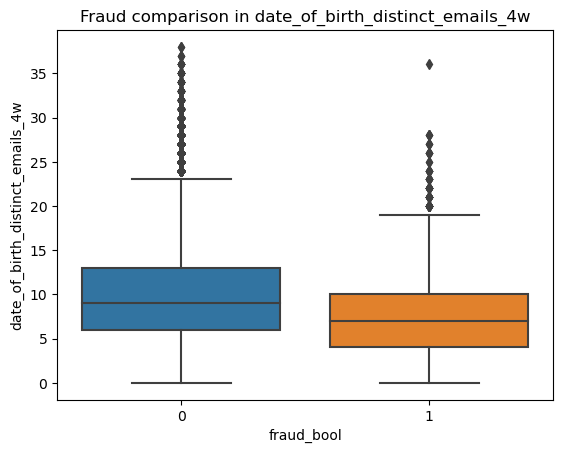

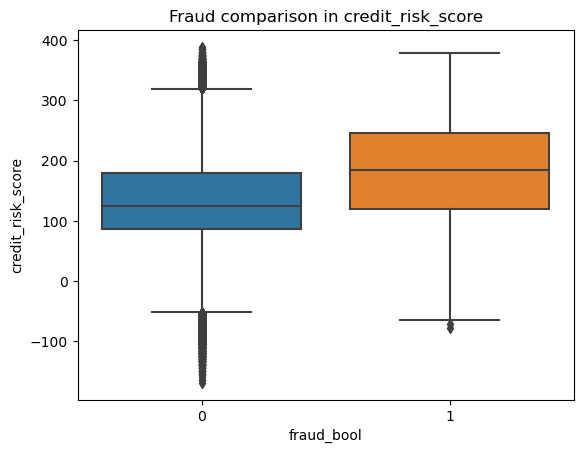

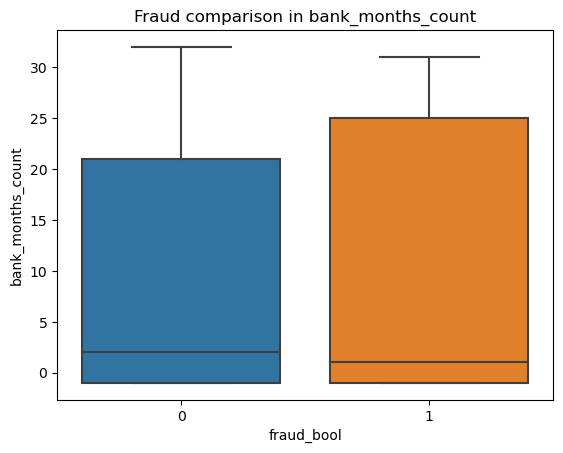

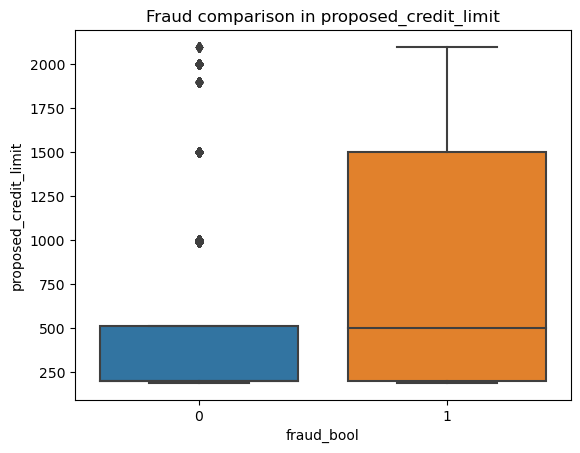

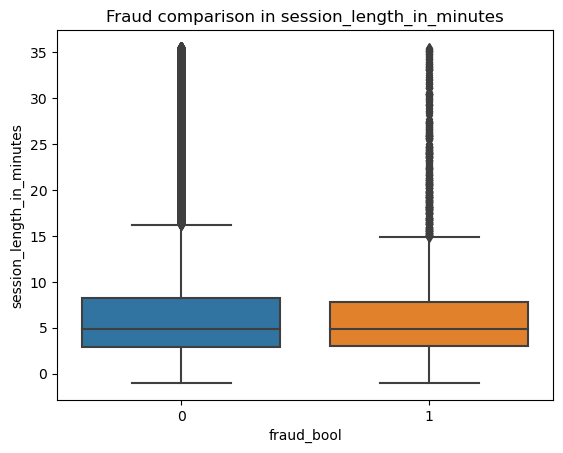

In [23]:
for col in num_cols:
    sns.boxplot(
    data=train,
    x=target,
    y=col)
    plt.title(f'Fraud comparison in {col}')
    plt.show()

Notes:
> Proposed Credit Limit, Credit Risk Score, and Current Address Months Count to have a greater disparity here, having higher medians than no fraudulent cases.

<b><h3>Let's see if a bar chart offers a different look

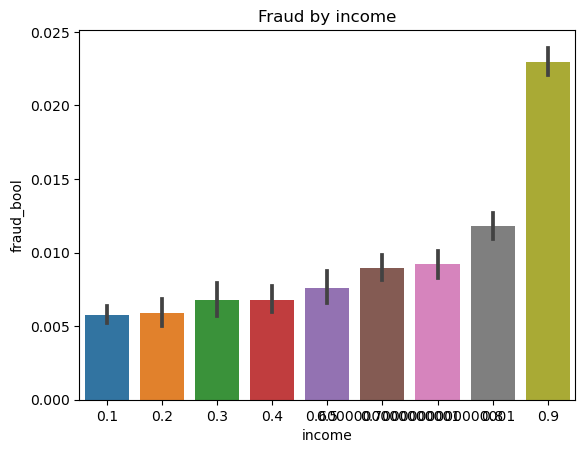

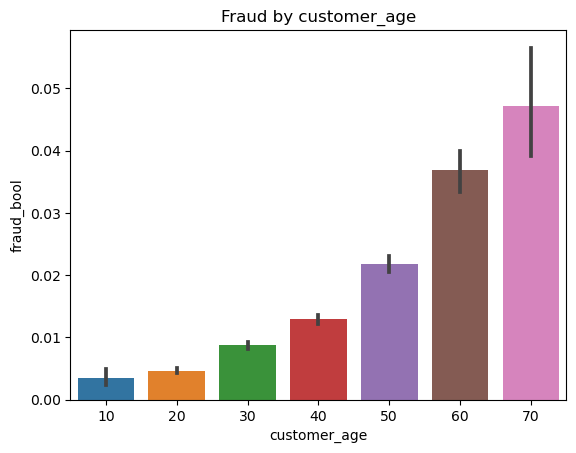

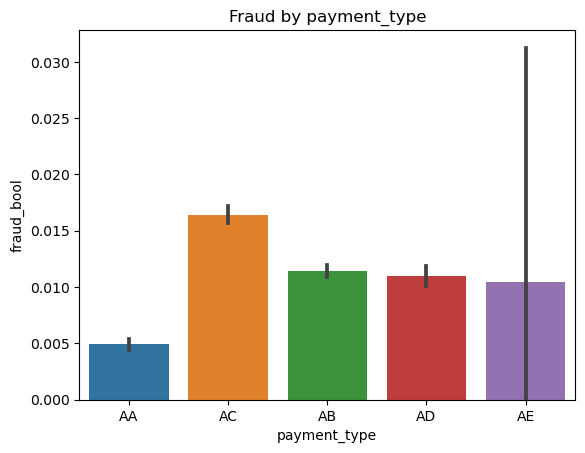

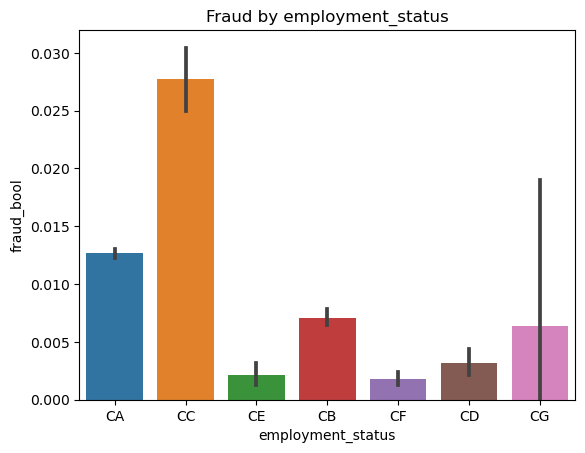

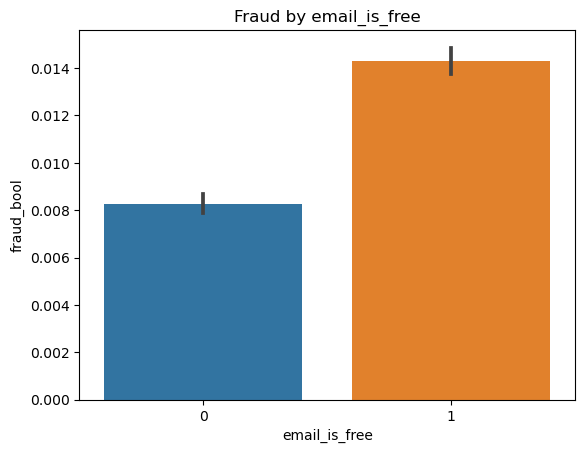

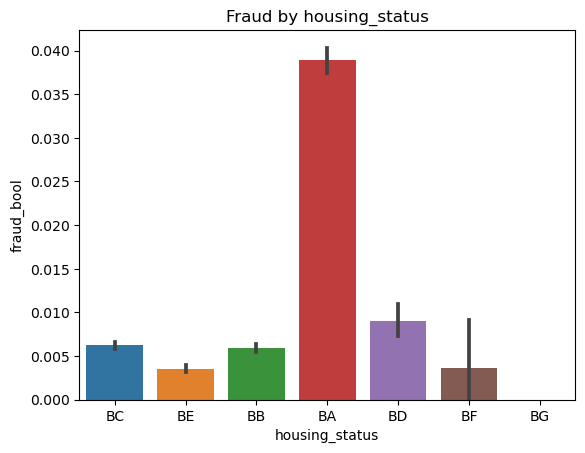

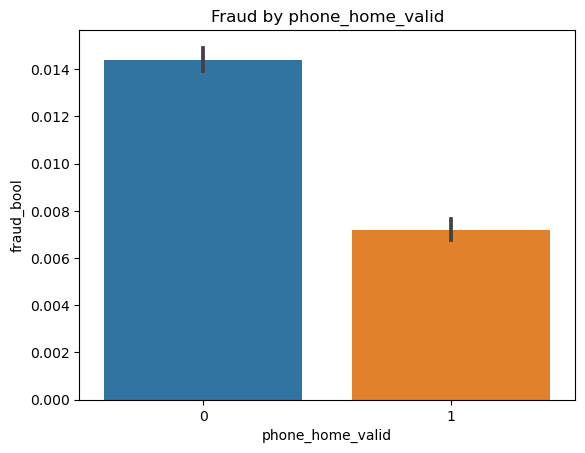

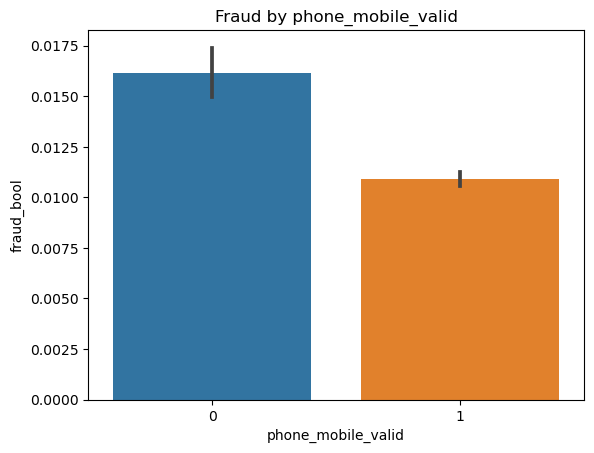

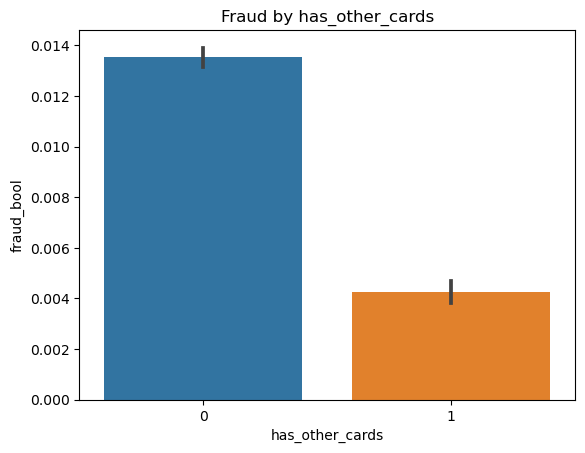

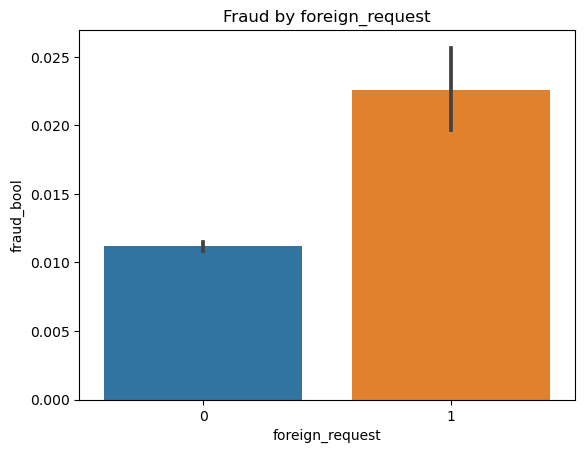

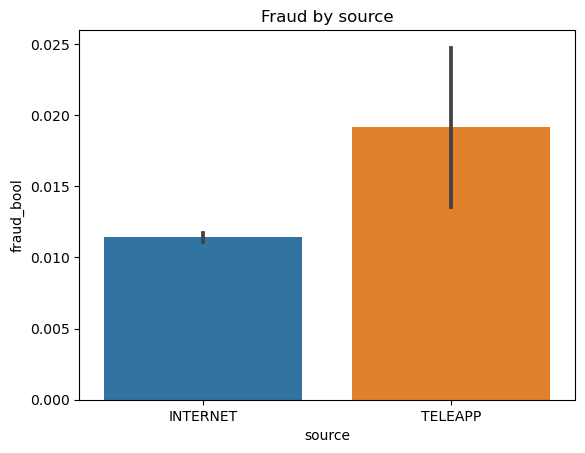

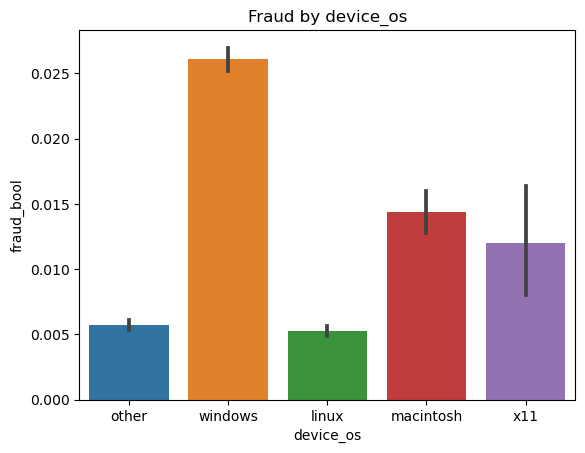

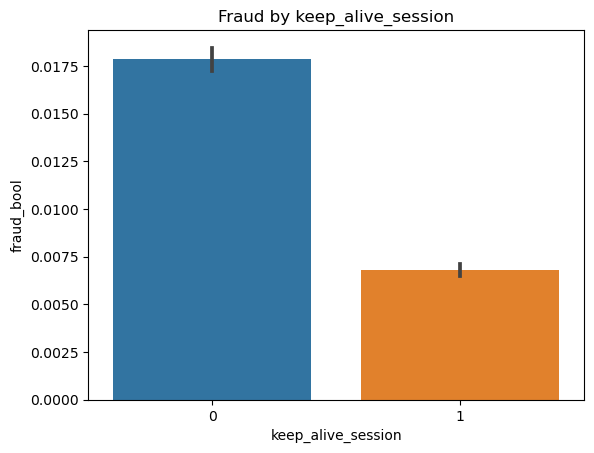

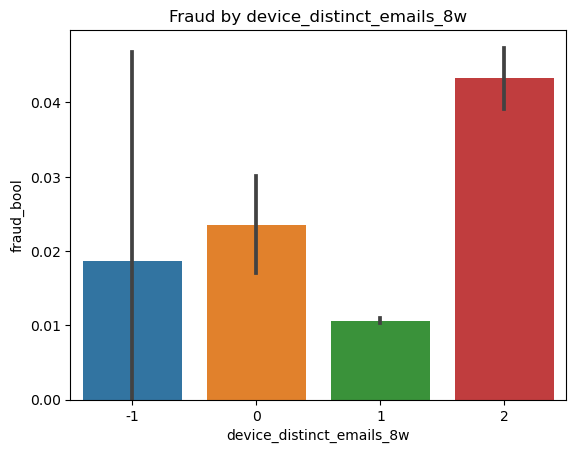

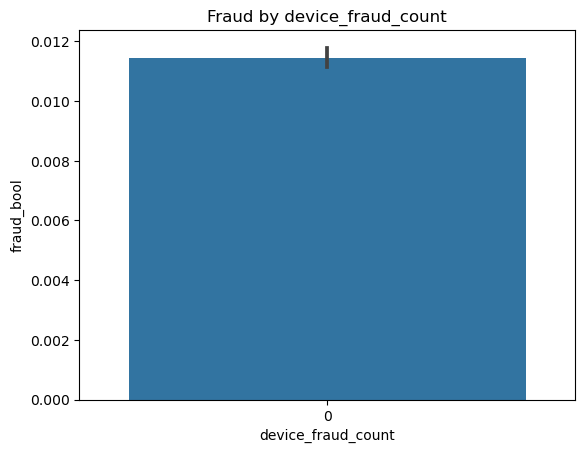

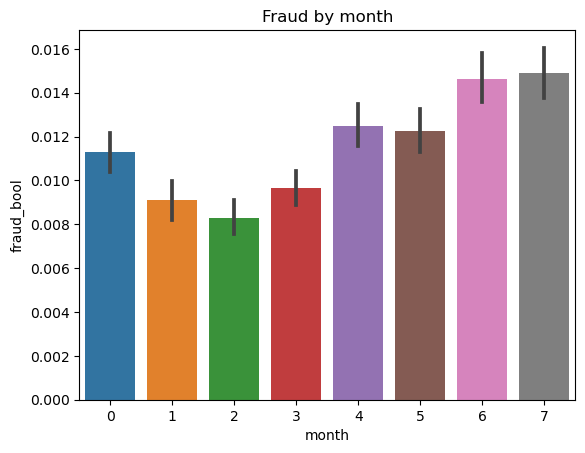

In [24]:
for col in cat_cols:
    sns.barplot(
        data=train,
        x=col,
        y=target
    )
    plt.title(f'Fraud by {col}')
    plt.show()

Takeways/Notes:
> Looking within each categorical feature against the target, fraud_bool, I am able to see if there is anything significant about where credit card fraud has occurred previously.\
> Income - Fraud was higher in higher income.\
> customer_age - Fraud was exponentially higher with age.\
> payment_type -  AC held the highest count of fraud, although all associated brackets were annonymized.\
> employment_status - CC held the highest count of fraud, although all associated brackets were annonymized.\
> email_is_free - There is a 57% increase in fraud over non-fraud cases in this category.\
> housing_status - BA held the highest count of fraud, although all associated brackets were annonymized.\
> phone_home_valid - There is decent fraud present, could be something to look into.\
> phone_mobile_valid - There is decent fraud present, could be something to look into.\
> has_other_cards - There is some fraud present, but nothing noteworthy.\
> foreign_request - There appears to be a 50% increase in fraud over non-fraud cases in this category.\
> source - There appears to be a 30% increase in fraud over non-fraud cases in this category.\
> device_os - Windows OS appears to be involved in most fraud cases, followed by Mac OS.\
> keep_alive_sessions - Some fraud present, but nothing noteworthy.\
> device_distinct_emails_8w - Huge values of fraud where there are 2 distinct emails in banking website from the used device in last 8 weeks.\
> device_fraud_count - Nothing discernable present.\
> Month - Nothing discernable present.

<b><h3>Multi-Variate Exploration

<b><h3>I'm going to use a heatmap to see correlation between all features and the target

In [25]:
train_corr = train.corr()

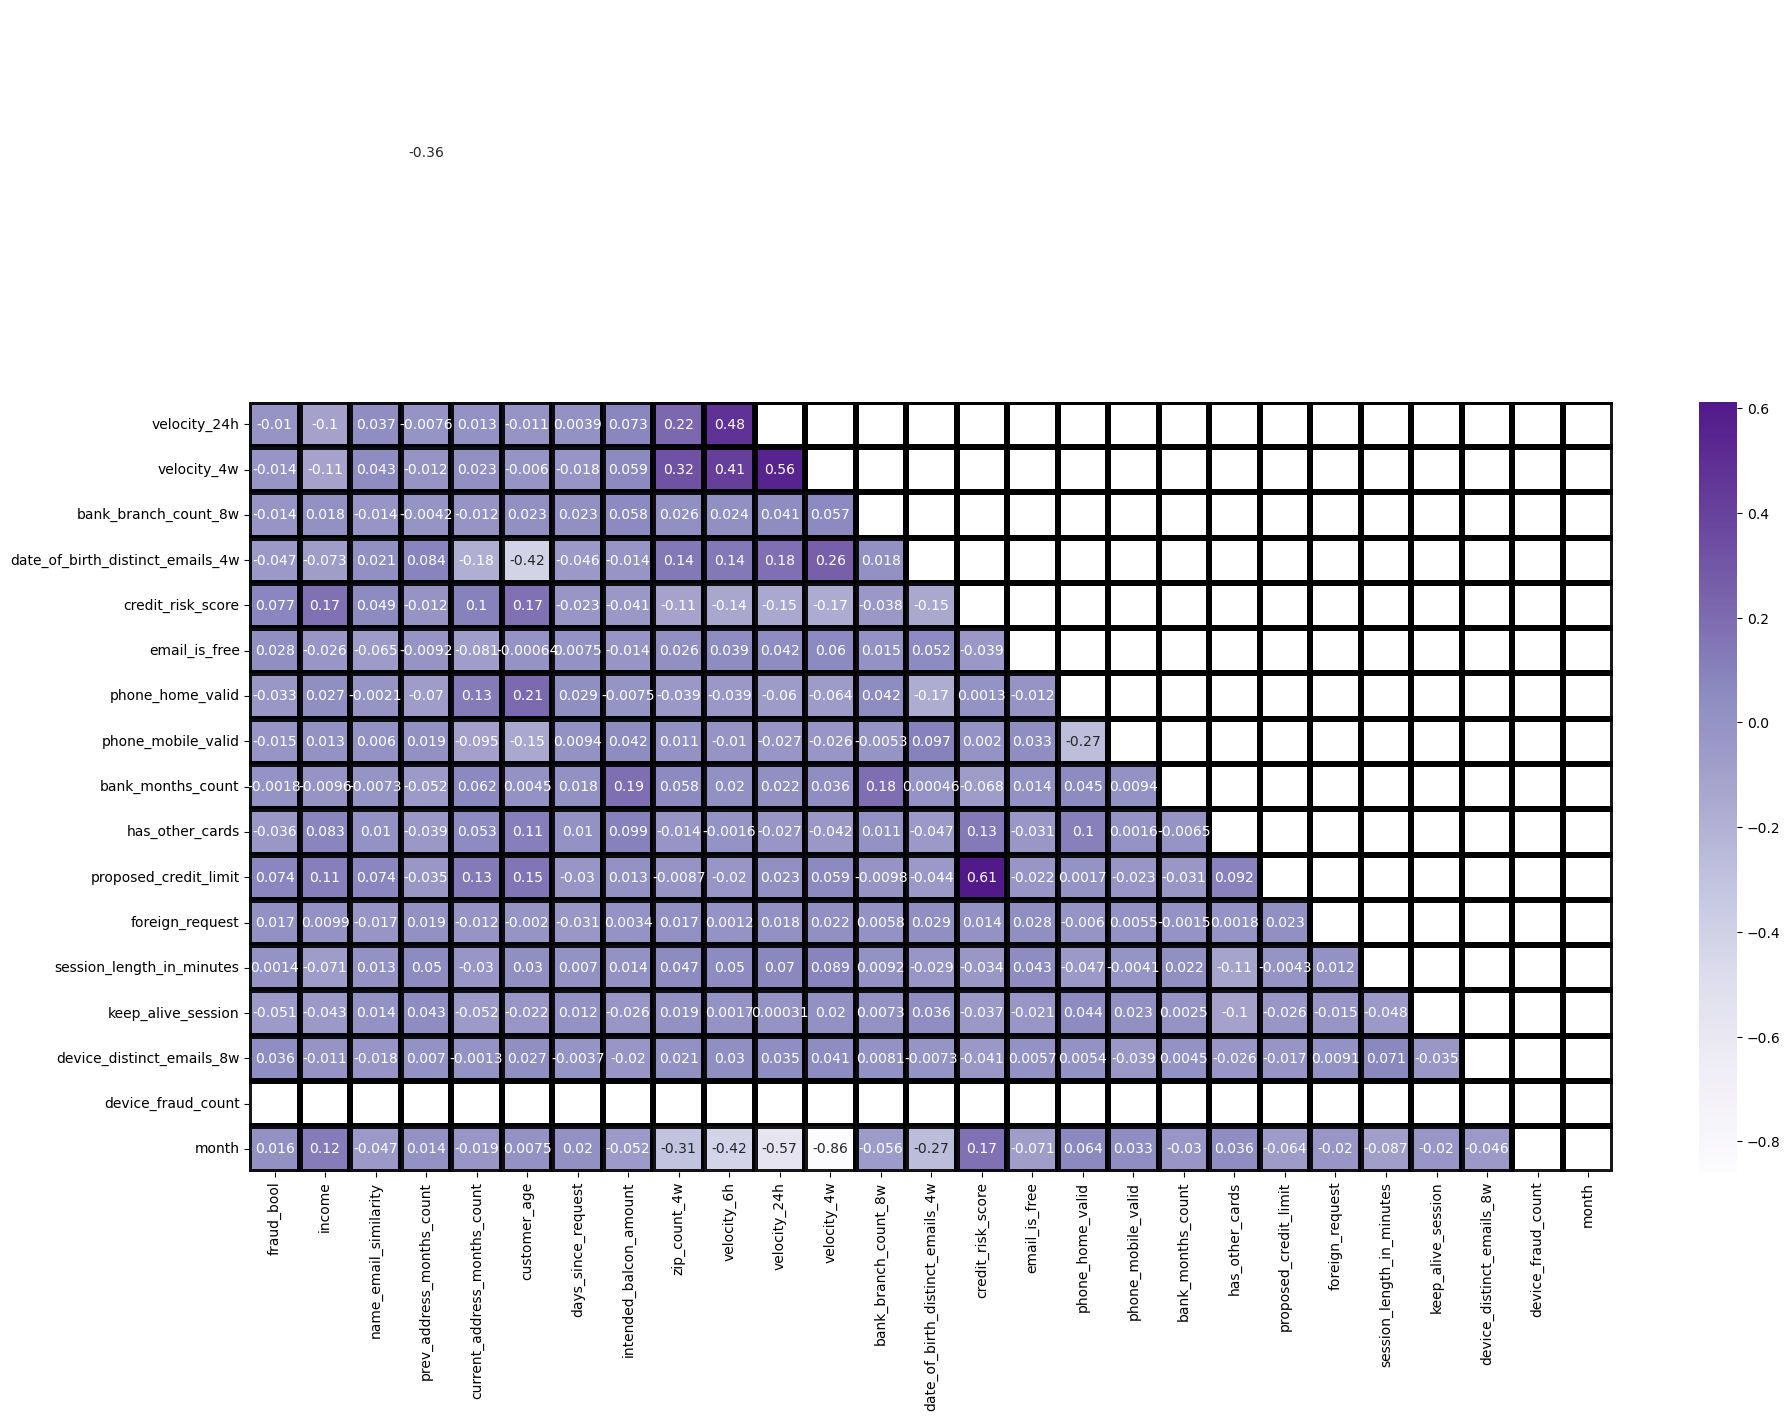

In [26]:

kwargs = {'alpha':.9,'linewidth':3, 'linestyle':'-', 
          'linecolor':'k','rasterized':False, 'edgecolor':'w', 
          'capstyle':'projecting',}

plt.figure(figsize=(22,10))
sns.heatmap(train_corr, cmap='Purples', annot=True, mask= np.triu(train_corr), **kwargs)
plt.ylim(27,10)
plt.show()

<b><h3>I want to rank the correlation to the target

In [27]:
from matplotlib import patches
def heatmap_ranked(train):
    df = train
    target='fraud_bool'

    plt.figure(figsize=(5,10))
    ax = sns.heatmap(train[abs(train.corr()[target]).sort_values(ascending=False).index].corr()[target].to_frame()[1:],
                        annot=True, cmap='Purples', vmin=-1, vmax=1)
    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(right=False, labelsize=8) 
    cbar.set_ticks([-1, -.5, 0, .5, 1])
    plt.tick_params(axis='both', left=False, bottom=False)

    rectangle = patches.Rectangle((0, 0), 1, 10, linewidth=1.5, edgecolor='#C40000', facecolor='none')
    ax.add_patch(rectangle)

    plt.title('Top 10 Correlated Features of Fraud')
    plt.show()

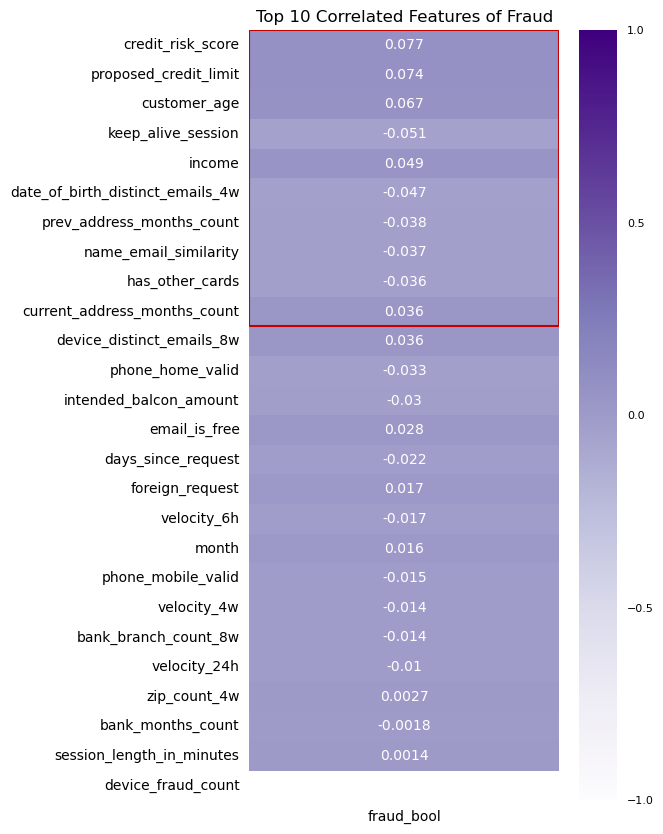

In [28]:
heatmap_ranked()

<b><h2>Post-Uni/Bi/Multi-Variate Exploration Questions:

<b><h3>Is there a relationship between <b>Proposed Credit Limit</b> and <b>Customer Age</b>?

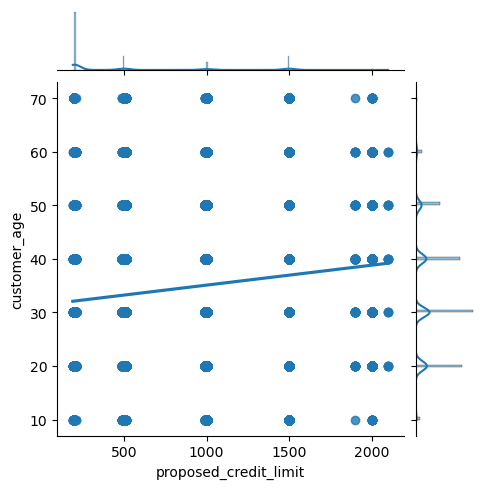

In [29]:
sns.jointplot(x="proposed_credit_limit", y="customer_age", data=train,  kind='reg', height=5)
plt.show()

<b>This is between two continuous variables, so I'll do a Pearson's R or Spearman's statistical test for correlation, based on distribution

𝐻0
 : There is no linear correlation between Proposed Credit Limit and Customer Age.

𝐻𝑎
 : There is a linear correlation between Proposed Credit Limit and Customer Age.

<b>Do my variables appear normally distributed? If Not, I'll do a Shapiro Test

<Axes: >

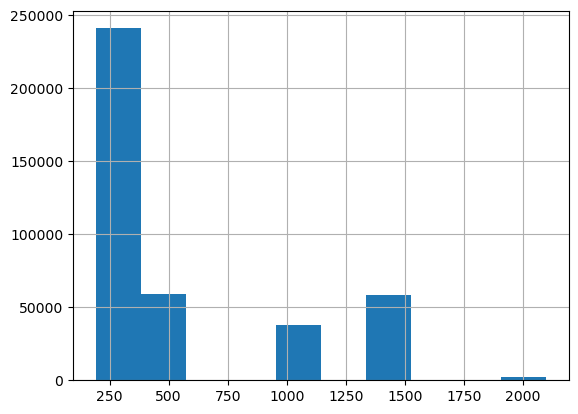

In [30]:
train['proposed_credit_limit'].hist()

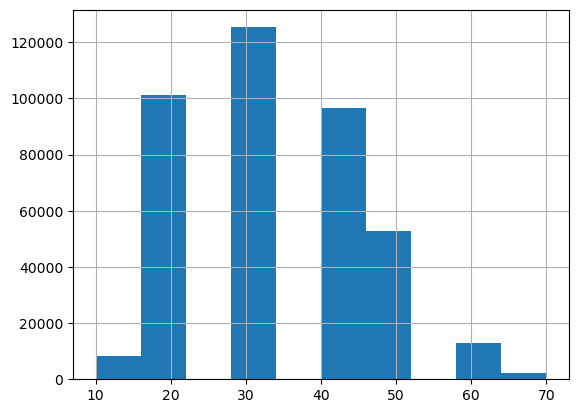

In [31]:
train['customer_age'].hist()
plt.show()

In [32]:
# shapiro test
r, p = stats.shapiro(train.proposed_credit_limit)
r, p
ex.eval_dist(r, p)

The data is NOT normally distributed


In [33]:
# shapiro test
r, p = stats.shapiro(train.customer_age)
r, p
ex.eval_dist(r, p)

The data is NOT normally distributed


In [64]:
r, p = stats.spearmanr(train.proposed_credit_limit, train.customer_age)

In [65]:
ex.eval_Spearman(r, p, α=0.05)

We reject H₀, there is a monotonic relationship.
Spearman’s r: 0.156647
P-value: 0.0


<b><h3>Is there a relationship between Credit Risk Score and Income?

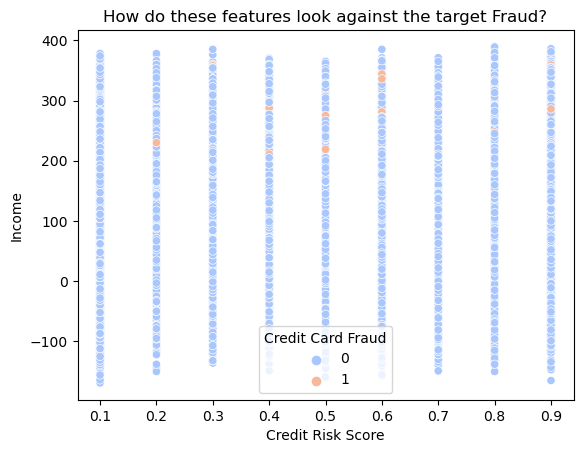

In [36]:
sns.scatterplot(train, y ='credit_risk_score', x ='income', hue='fraud_bool', palette = "coolwarm")
plt.xlabel("Credit Risk Score")
plt.ylabel("Income")
plt.legend(title="Credit Card Fraud")
plt.title("How do these features look against the target Fraud?")
plt.show()

<b>This is between two continuous variables, so I'll do a Pearson's R or Spearman's statistical test for correlation, based on distribution

𝐻0
 : There is no linear correlation between Credit Risk Score and Income.

𝐻𝑎
 : There is a linear correlation between Credit Risk Score and Income.

<b>Do my variables appear normally distributed? If Not, I'll do a Shapiro Test

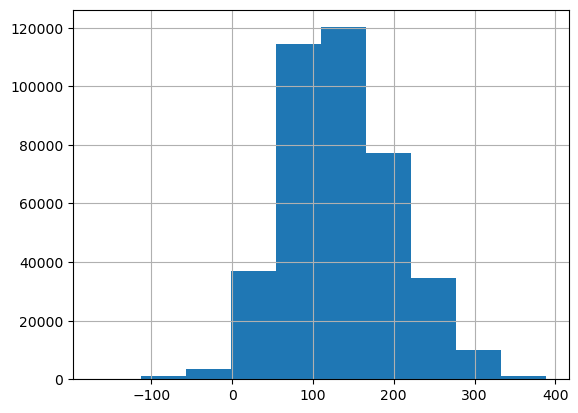

In [37]:
train['credit_risk_score'].hist()
plt.show()

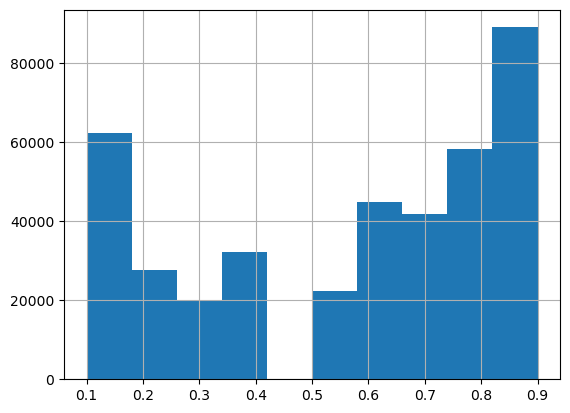

In [38]:
train['income'].hist()
plt.show()

In [39]:
# shapiro test
r, p = stats.shapiro(train.credit_risk_score)
r, p
ex.eval_dist(r, p)

The data is NOT normally distributed


In [40]:
# shapiro test
r, p = stats.shapiro(train.income)
r, p
ex.eval_dist(r, p)

The data is NOT normally distributed


In [66]:
r, p = stats.spearmanr(train.credit_risk_score, train.income)

In [67]:
ex.eval_Spearman(r, p, α=0.05)

We reject H₀, there is a monotonic relationship.
Spearman’s r: 0.181140
P-value: 0.0


<b><h3>Is there a relationship between Customer Age and Credit Risk Score?

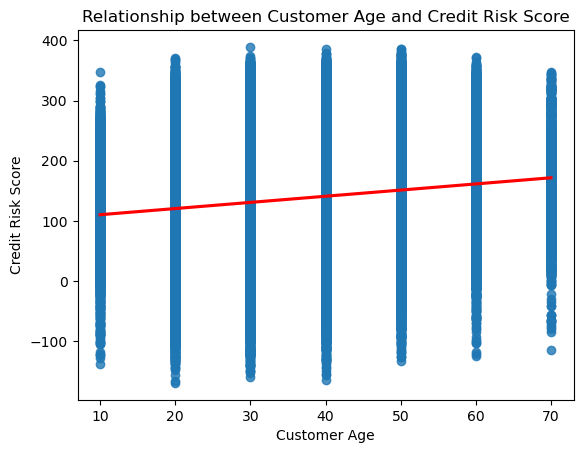

In [75]:
sns.regplot(y = train.credit_risk_score, x = train.customer_age, line_kws={'color':'red'})
plt.xlabel('Customer Age')
plt.ylabel('Credit Risk Score')
plt.title('Relationship between Customer Age and Credit Risk Score')
plt.show()

<b>This is between two continuous variables, so I'll do a Pearson's R or Spearman's statistical test for correlation, based on distribution

𝐻0
 : There is no linear correlation between Customer Age and Credit Risk Score.

𝐻𝑎
 : There is a linear correlation between Customer Age and Credit Risk Score.

<b>Do my variables appear normally distributed? If Not, I'll do a Shapiro Test

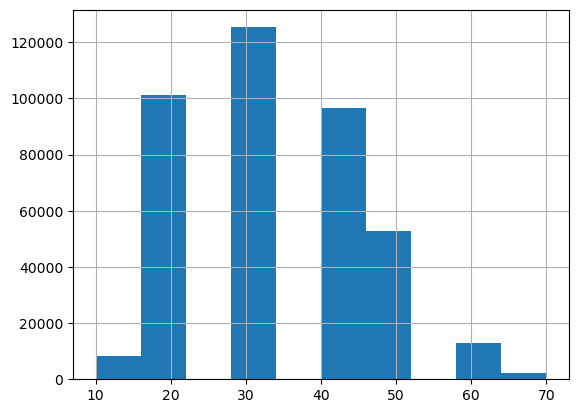

In [43]:
train['customer_age'].hist()
plt.show()

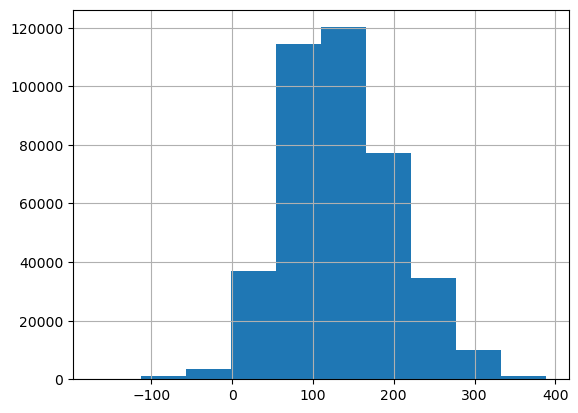

In [44]:
train['credit_risk_score'].hist()
plt.show()

In [45]:
# shapiro test
r, p = stats.shapiro(train.customer_age)
r, p
ex.eval_dist(r, p)

The data is NOT normally distributed


In [46]:
# shapiro test
r, p = stats.shapiro(train.credit_risk_score)
r, p
ex.eval_dist(r, p)

The data is NOT normally distributed


In [68]:
r, p = stats.spearmanr(train.customer_age, train.credit_risk_score)

In [69]:
ex.eval_Spearman(r, p, α=0.05)

We reject H₀, there is a monotonic relationship.
Spearman’s r: 0.172917
P-value: 0.0


<b><h3>Is there a relationship between 'Device Distinct Emails 8w' and 'Name Email Similarity'?

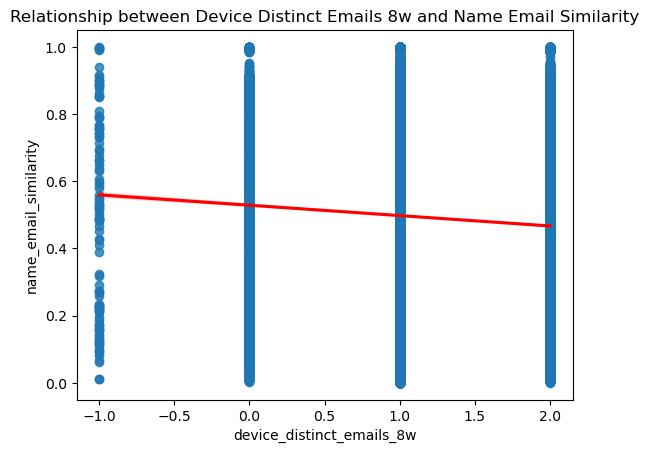

In [76]:
sns.regplot(data = train, x = 'device_distinct_emails_8w', y = 'name_email_similarity', line_kws={'color':'red'})
plt.title('Relationship between Device Distinct Emails 8w and Name Email Similarity')
plt.show()

<b>This is between two continuous variables, so I'll do a Pearson's R or Spearman's statistical test for correlation, based on distribution

𝐻0
 : There is no linear correlation between 'Device Distinct Emails 8w' and 'Name Email Similarity'.

𝐻𝑎
 : There is a linear correlation between 'Device Distinct Emails 8w' and 'Name Email Similarity'.

<b>Do my variables appear normally distributed? If Not, I'll do a Shapiro Test

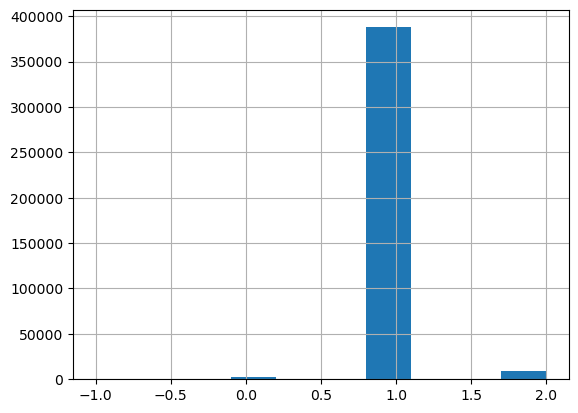

In [49]:
train['device_distinct_emails_8w'].hist()
plt.show()

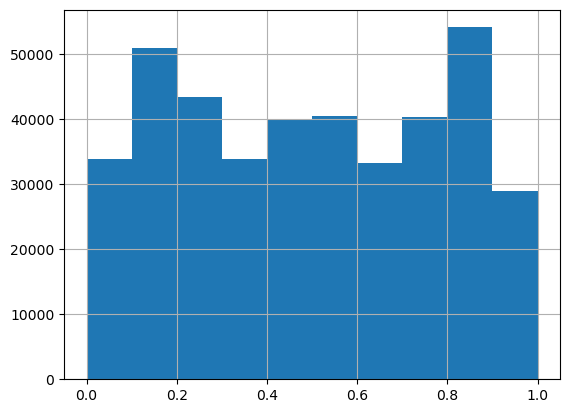

In [50]:
train['name_email_similarity'].hist()
plt.show()

In [51]:
# shapiro test
r, p = stats.shapiro(train.device_distinct_emails_8w)
r, p
ex.eval_dist(r, p)

The data is NOT normally distributed


In [52]:
# shapiro test
r, p = stats.shapiro(train.name_email_similarity)
r, p
ex.eval_dist(r, p)

The data is NOT normally distributed


In [70]:
r, p = stats.spearmanr(train.device_distinct_emails_8w, train.name_email_similarity)

In [71]:
ex.eval_Spearman(r, p, α=0.05)

We reject H₀, there is a monotonic relationship.
Spearman’s r: -0.018811
P-value: 1.3668449791346552e-32


<b><h3>Is there a relationship between Current Address Months Count and Zip Count 4w?

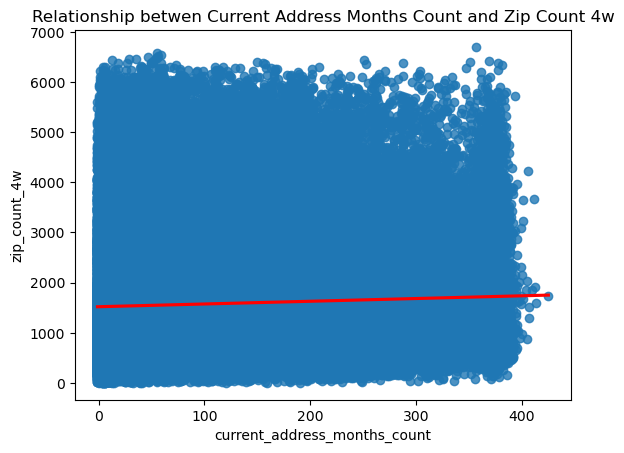

In [77]:
sns.regplot(data = train, x = 'current_address_months_count', y = 'zip_count_4w', line_kws={'color':'red'})
plt.title('Relationship betwen Current Address Months Count and Zip Count 4w')
plt.show()

<b>This is between two continuous variables, so I'll do a Pearson's R or Spearman's statistical test for correlation, based on distribution

𝐻0
 : There is no linear correlation between 'Current Address Months Count' and 'Zip Count 4w'.

𝐻𝑎
 : There is a linear correlation between 'Current Address Months Count' and 'Zip Count 4w'.

<b>Do my variables appear normally distributed? If Not, I'll do a Shapiro Test

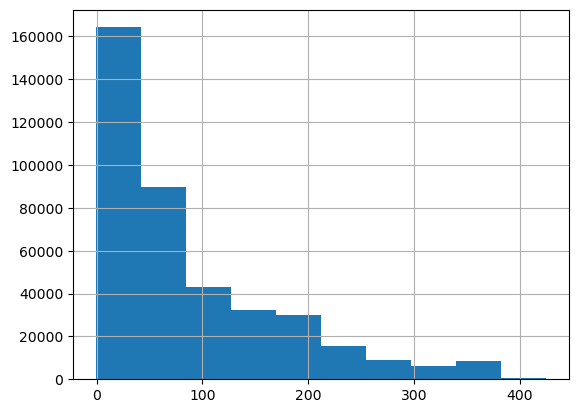

In [54]:
train['current_address_months_count'].hist()
plt.show()

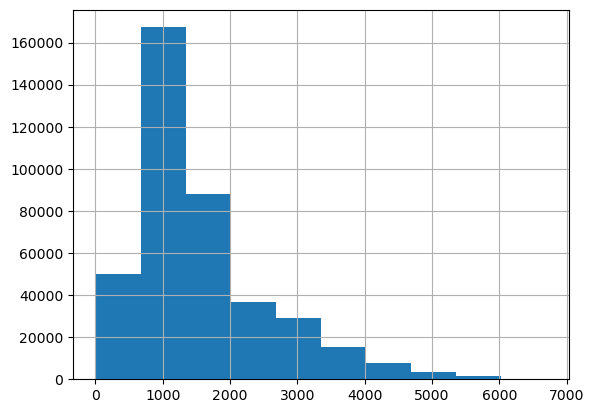

In [55]:
train['zip_count_4w'].hist()
plt.show()

In [56]:
# shapiro test
r, p = stats.shapiro(train.current_address_months_count)
r, p
ex.eval_dist(r, p)

The data is NOT normally distributed


In [57]:
# shapiro test
r, p = stats.shapiro(train.zip_count_4w)
r, p
ex.eval_dist(r, p)

The data is NOT normally distributed


In [72]:
r, p = stats.spearmanr(train.current_address_months_count, train.zip_count_4w)

In [73]:
ex.eval_Spearman(r, p, α=0.05)

We reject H₀, there is a monotonic relationship.
Spearman’s r: 0.069852
P-value: 0.0


<b><h3>Is there a relationship between Email is Free and Source?

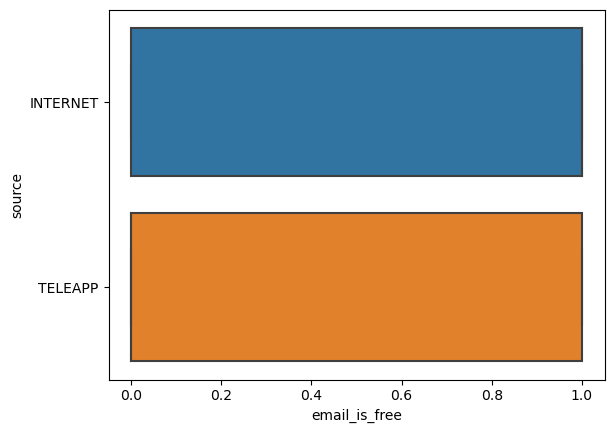

In [79]:
sns.boxplot(data = train, y = 'source', x = 'email_is_free' )
plt.show()

<b>This is between two categorical variables, so I will conduct a Chi Square test

𝐻0
  = The variable 'Email_is_Free' is independent of the variable 'Source'.

𝐻𝑎
  = The variable 'Email_is_Free' is NOT independent of the variable 'Source'.

In [59]:
null = "The variable 'Email_is_Free' is independent of the variable 'Source'"
confidence_level = .95
alpha = round(1 - confidence_level,2)
alpha

0.05

In [60]:
# Create the crosstab.

ctab = pd.crosstab(train.email_is_free, train.source)
ctab

source,INTERNET,TELEAPP
email_is_free,,
0,187503,1257
1,209309,1250


In [61]:
Chi2, p, degf, expected = stats.chi2_contingency(ctab)

In [62]:
print(f'Our p-value is {p}.')

Our p-value is 0.004151087688555709.


In [63]:
print(f'Our p-value is less than our alpha: {p < alpha}')
if p < alpha:
    print(f'We reject H₀:{null}')
else:
    print(f'We FAIL to reject H₀:{null}')

Our p-value is less than our alpha: True
We reject H₀:The variable 'Email_is_Free' is independent of the variable 'Source'
